In [1]:
#biblioteca de calculo
import numpy as np

#biblioteca para machine learning scikit-learn
from sklearn.datasets import load_iris # carregar os dados da base iris
from sklearn.model_selection import train_test_split # funçao para dividir a base em treino e teste
from sklearn.preprocessing import OneHotEncoder #função para normalização

#funções diversas da bibliotecas keras
from tensorflow.keras.models import Sequential # objeto que cria rede neural
from tensorflow.keras.layers import Dense # objeto ue cria camadas
from tensorflow.keras.optimizers import Adam # otimizador da rede neural


In [2]:
iris_data = load_iris() # load the iris dataset

print('Example data: ')
print(iris_data.data[:7])
print('Example labels: ')
print(iris_data.target[48:115])

x = iris_data.data
y_= iris_data.target.reshape(-1, 1) # Convert data to a single column

# Normalização
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)
print(y[48:53])

# Dividir em Treino e Teste
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30)

Example data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]]
Example labels: 
[0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [3]:
#inicia a construção da rede neural
model = Sequential()

#adicionando camadas
#na primeira camada, é necessário definir o input_shape ( que deve ser igual ao numero de colunas no X)

model.add(Dense(10, input_shape=(4,), activation='relu', name='fc11'))
model.add(Dense(15, activation='relu', name='fc22'))
#normalmente quando é um problema de classificação, utilizamos ativação softmax na ultima camada
model.add(Dense(3, activation='softmax', name='output'))

# O método compile recebe o otimizador, função loss e a métrica
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())

Neural Network Model Summary: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc11 (Dense)                (None, 10)                50        
                                                                 
 fc22 (Dense)                (None, 15)                165       
                                                                 
 output (Dense)              (None, 3)                 48        
                                                                 
Total params: 263
Trainable params: 263
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
#treina o modelo usando um certo numero de iterações (épocas)
history = model.fit(train_x, train_y, verbose=2, epochs=200, validation_split=0.3)

Epoch 1/200
3/3 - 6s - loss: 1.1534 - accuracy: 0.7397 - val_loss: 1.3752 - val_accuracy: 0.6250 - 6s/epoch - 2s/step
Epoch 2/200
3/3 - 0s - loss: 1.1157 - accuracy: 0.7534 - val_loss: 1.3303 - val_accuracy: 0.6250 - 35ms/epoch - 12ms/step
Epoch 3/200
3/3 - 0s - loss: 1.0840 - accuracy: 0.7534 - val_loss: 1.2831 - val_accuracy: 0.6250 - 33ms/epoch - 11ms/step
Epoch 4/200
3/3 - 0s - loss: 1.0506 - accuracy: 0.7534 - val_loss: 1.2371 - val_accuracy: 0.6250 - 33ms/epoch - 11ms/step
Epoch 5/200
3/3 - 0s - loss: 1.0188 - accuracy: 0.7534 - val_loss: 1.1924 - val_accuracy: 0.6250 - 31ms/epoch - 10ms/step
Epoch 6/200
3/3 - 0s - loss: 0.9887 - accuracy: 0.7534 - val_loss: 1.1489 - val_accuracy: 0.6250 - 31ms/epoch - 10ms/step
Epoch 7/200
3/3 - 0s - loss: 0.9591 - accuracy: 0.7534 - val_loss: 1.1071 - val_accuracy: 0.6250 - 31ms/epoch - 10ms/step
Epoch 8/200
3/3 - 0s - loss: 0.9303 - accuracy: 0.7534 - val_loss: 1.0695 - val_accuracy: 0.6250 - 37ms/epoch - 12ms/step
Epoch 9/200
3/3 - 0s - loss:

In [5]:
results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))


2/2 [==============================] - 0s 8ms/step - loss: 0.1596 - accuracy: 0.9778
Final test set loss: 0.159569
Final test set accuracy: 0.977778


[Text(0.5, 23.52222222222222, 'Época')]

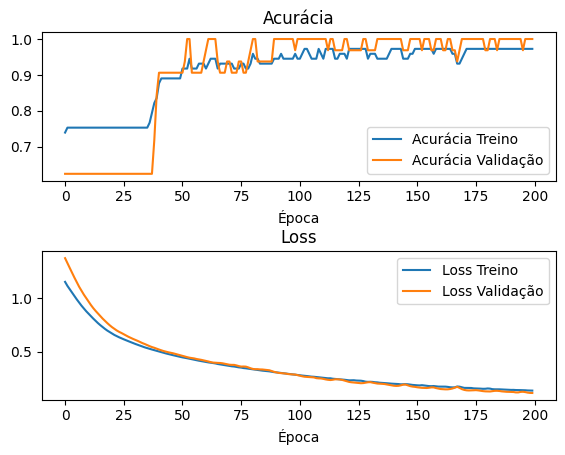

In [6]:
from matplotlib import pyplot

fig, axs = pyplot.subplots(2)

fig.tight_layout(pad=3.0)

x=history.history['accuracy']
xv=history.history['val_accuracy']
axs[0].plot(x, label='Acurácia Treino')
axs[0].plot(xv, label='Acurácia Validação')
axs[0].legend()
axs[0].set_title('Acurácia')
axs[0].set(xlabel='Época')

x=history.history['loss']
xv=history.history['val_loss']
axs[1].plot(x, label='Loss Treino')
axs[1].plot(xv, label='Loss Validação')
axs[1].legend()
axs[1].set_title('Loss')
axs[1].set(xlabel='Época')

In [ ]:
# model.predict()

In [7]:

#train_y, test_y
res=model.predict(test_x)
res2=res.astype(float)
np.set_printoptions(precision=8)
print(np.around(res2[:10],3))
print(np.around(res2[:10],0))
#print(res2[:10])
print(test_y[:10])


2/2 [==============================] - 0s 8ms/step
[[0.005 0.693 0.302]
 [0.    0.077 0.923]
 [0.    0.085 0.915]
 [0.987 0.013 0.   ]
 [0.986 0.014 0.   ]
 [0.    0.097 0.903]
 [0.    0.351 0.649]
 [0.001 0.386 0.613]
 [0.    0.053 0.947]
 [0.004 0.896 0.1  ]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [8]:
from sklearn.metrics import confusion_matrix
test_pred=model.predict(test_x)
test_pred = np.around(test_pred,0)
print(type(test_pred), type(test_y))
test_pred = test_pred.astype(int)
test_y = test_y.astype(int)
confusion_matrix(test_y.argmax(axis=1), test_pred.argmax(axis=1))

2/2 [==============================] - 0s 3ms/step
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


array([[11,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 20]])

In [ ]:
#exemplo de rede neural com regressao

In [9]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
import io
import requests
import numpy as np

In [11]:
url = "https://raw.githubusercontent.com/silviostanzani/PosBigData/master/Auto2.csv"
s = requests.get(url).content
dataframe = read_csv(io.StringIO(s.decode('utf-8')))
print(dataframe)
print(dataframe.columns)
dataset = dataframe.values

# split into input (X) and output (Y) variables
X_ = dataset[:,2:8]
y_ = dataset[:,1]
#print(X)
#print(y)

X = np.asarray(X_).astype(np.float32)
y = np.asarray(y_).astype(np.float32)

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20)

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0         130    3504          12.0    70   
1    15.0          8         350.0         165    3693          11.5    70   
2    18.0          8         318.0         150    3436          11.0    70   
3    16.0          8         304.0         150    3433          12.0    70   
4    17.0          8         302.0         140    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
392  27.0          4         140.0          86    2790          15.6    82   
393  44.0          4          97.0          52    2130          24.6    82   
394  32.0          4         135.0          84    2295          11.6    82   
395  28.0          4         120.0          79    2625          18.6    82   
396  31.0          4         119.0          82    2720          19.4    82   

     origin                       name  
0         1  chevrolet

In [12]:
model = Sequential()

#model.add(Dense(20, input_dim=6, activation='relu'))
#model.add(Dense(1))
model.add(Dense(20, input_dim=6, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))


# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])


In [13]:
history=model.fit(train_x, train_y, verbose=2, epochs=200, validation_split=0.3)


Epoch 1/200
7/7 - 1s - loss: 32.7819 - mse: 32.7819 - val_loss: 8.7725 - val_mse: 8.7725 - 1s/epoch - 168ms/step
Epoch 2/200
7/7 - 0s - loss: 14.4550 - mse: 14.4550 - val_loss: 6.0782 - val_mse: 6.0782 - 41ms/epoch - 6ms/step
Epoch 3/200
7/7 - 0s - loss: 2.7850 - mse: 2.7850 - val_loss: 3.9932 - val_mse: 3.9932 - 46ms/epoch - 7ms/step
Epoch 4/200
7/7 - 0s - loss: 4.2634 - mse: 4.2634 - val_loss: 1.1899 - val_mse: 1.1899 - 41ms/epoch - 6ms/step
Epoch 5/200
7/7 - 0s - loss: 1.3051 - mse: 1.3051 - val_loss: 2.0500 - val_mse: 2.0500 - 42ms/epoch - 6ms/step
Epoch 6/200
7/7 - 0s - loss: 1.4949 - mse: 1.4949 - val_loss: 0.8277 - val_mse: 0.8277 - 65ms/epoch - 9ms/step
Epoch 7/200
7/7 - 0s - loss: 1.0932 - mse: 1.0932 - val_loss: 1.0027 - val_mse: 1.0027 - 44ms/epoch - 6ms/step
Epoch 8/200
7/7 - 0s - loss: 0.9895 - mse: 0.9895 - val_loss: 0.9520 - val_mse: 0.9520 - 49ms/epoch - 7ms/step
Epoch 9/200
7/7 - 0s - loss: 0.9023 - mse: 0.9023 - val_loss: 0.8017 - val_mse: 0.8017 - 43ms/epoch - 6ms/st

In [14]:
results = model.evaluate(test_x, test_y)

print(results)

3/3 [==============================] - 0s 5ms/step - loss: 0.2850 - mse: 0.2850
[0.28502342104911804, 0.28502342104911804]


[Text(0.5, 23.52222222222222, 'Época')]

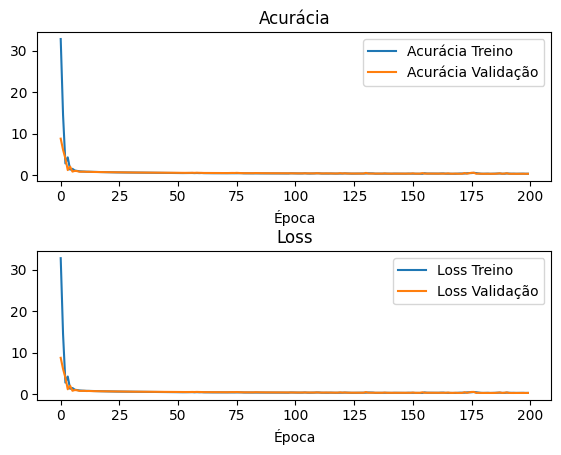

In [16]:
from matplotlib import pyplot

fig, axs = pyplot.subplots(2)

fig.tight_layout(pad=3.0)

x=history.history['mse']
xv=history.history['val_mse']
axs[0].plot(x, label='Acurácia Treino')
axs[0].plot(xv, label='Acurácia Validação')
axs[0].legend()
axs[0].set_title('Acurácia')
axs[0].set(xlabel='Época')

x=history.history['loss']
xv=history.history['val_loss']
axs[1].plot(x, label='Loss Treino')
axs[1].plot(xv, label='Loss Validação')
axs[1].legend()
axs[1].set_title('Loss')
axs[1].set(xlabel='Época')

In [17]:
#train_y, test_y
res=model.predict(test_x)
#res2=res.astype(float)
np.set_printoptions(precision=0)
#print(np.around(res2[:10],3))
print(res[:10])
print(test_y[:10])

3/3 [==============================] - 0s 3ms/step
[[4.]
 [5.]
 [5.]
 [9.]
 [4.]
 [4.]
 [8.]
 [8.]
 [4.]
 [5.]]
[4. 4. 4. 8. 4. 4. 8. 8. 4. 4.]


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y, res, squared=False)

0.12975901731140607